###EDA

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv
# Load the dataset
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Do necessary preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Select the relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
# Perform KMeans clustering
#predefined # of classes k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [ ]:
# prompt: find number of samples in each cluster

cluster_counts = df['Cluster'].value_counts()

print(cluster_counts)


Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64


###Finding optimum number of clusters:
1. Elbow method

SSE -
c1: (1,2) (2,3) (4,3) - ce1 = (1,1)
(1,2)=> (1-1)^2+(1-2)^2 +
(2,3)=> (1-2)^2+(1-3)^2 +
(4,3)=> (1-4)^2+(1-3)^2
c1: total sse - s1
c2: total sse - s2
c3: total sse - s3
SSE - s1+s2+s3
WCSS - Within Cluster Sum of Errors (SSE)
2. Silhouette method

###Elbow method
k=1,k=2,3,4,6, kmeans, wcss/sse


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
wcss = []
for k in range(1, 11): #1 to 10
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  #k=1 wcss
  #k=2 wcss
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.181757826821325,
 32.375253681582876,
 29.076176851244277]

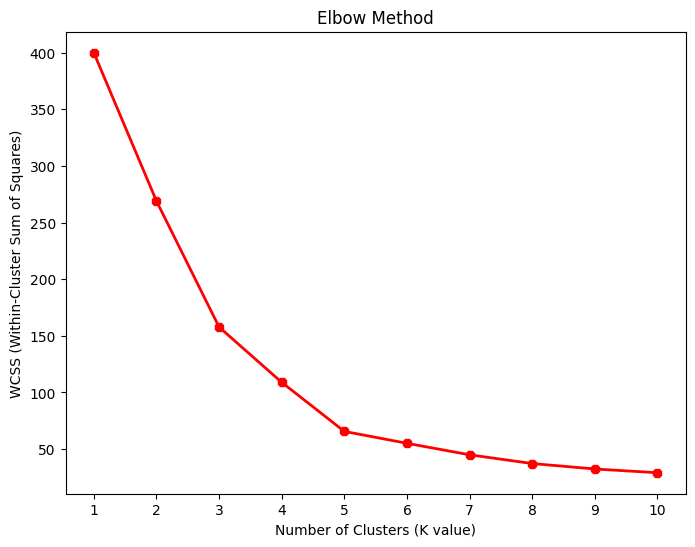

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#The elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K value)')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [ ]:
df1 = df
#Taking 5 clusters
kmeans=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
#Fitting the input data
kmeans.fit(X)
#predicting the labels of the input data
cluster_labels=kmeans.predict(X)
#adding the labels to a column named label
df1["Cluster"] = cluster_labels
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
#cluster center
kmeans.cluster_centers_

array([[ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

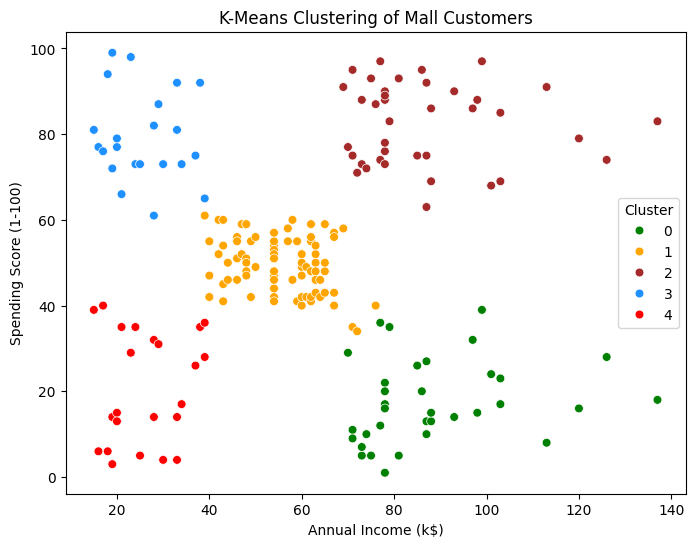

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue="Cluster",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 40 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.show()

### Silhouette Method
The Silhouette method calculates the average silhouette score for different numbers of clusters. The silhouette score measures how similar an object is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined clusters.

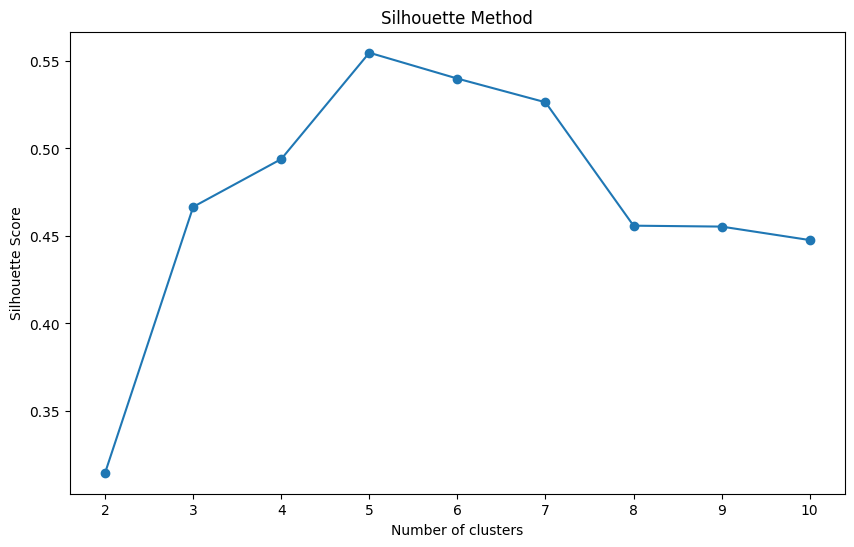

In [ ]:
# (2,1)   => c1 score, c2 score, c3 score
# -1 to 1
from sklearn.metrics import silhouette_score

# Silhouette method to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()